In [3]:
import datetime as dt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from nsepy import get_history as gh

plt.style.use("fivethirtyeight")

## Defining Parameters

In [7]:
# list of stocks to fetch and analyze
stocks = ['TATAMOTORS','DABUR', 'ICICIBANK','WIPRO','BPCL','IRCTC','INFY','RELIANCE']

# date range for data fetching
start_date = dt.date(2020, 10, 14)
end_date = dt.date.today()

print(f"{len(stocks)} assets in the portfolio.")

8 assets in the portfolio.


## Fetching Data 

In [17]:
# create empty dataframe
data = pd.DataFrame()

for idx, stock in enumerate(stocks):
    # fetch stock symbol and close price
    stock_data = gh(symbol=stock, start=start_date, end=end_date)[['Symbol', 'Close']]
    # rename columns and drop symbols
    stock_data = (stock_data.rename(columns={"Close": stock_data['Symbol'][0]})
                            .drop(["Symbol"], axis=1))
    
    if idx == 0:
        data = stock_data
    elif idx != 0:
        data = data.join(stock_data)

data

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
Date,,,,,,,,
2020-10-14,130.70,516.95,406.80,350.45,332.90,1338.05,1137.00,2287.50
2020-10-15,126.95,517.60,391.00,341.60,326.65,1329.50,1108.25,2206.50
2020-10-16,127.75,511.70,396.10,339.65,339.95,1328.10,1127.50,2175.80
2020-10-19,128.25,519.30,417.10,343.20,346.65,1326.90,1125.90,2176.20
2020-10-20,129.65,528.05,414.60,346.75,343.35,1332.20,1137.50,2155.90
...,...,...,...,...,...,...,...,...
2022-09-14,450.20,567.00,918.10,416.30,336.15,712.85,1475.40,2588.35
2022-09-15,447.25,563.45,917.60,415.05,331.40,724.35,1432.80,2562.70
2022-09-16,432.50,546.40,909.10,401.65,321.30,703.00,1377.05,2499.20


## Univariate Analysis

### Plotting Close Price history

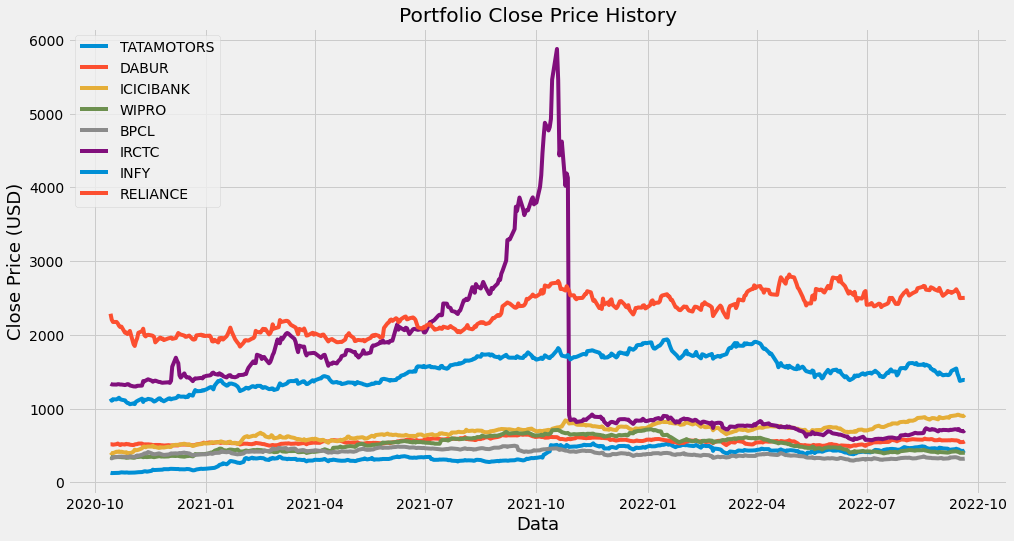

In [20]:
fig = plt.figure(figsize=(15,8))

for value in data.columns.values:
    plt.plot(data[value], label = value)

plt.title("Portfolio Close Price History")
plt.xlabel("Data", fontsize=18)
plt.ylabel("Close Price (USD)", fontsize=18)
plt.legend(data.columns.values, loc = "upper left")

plt.show(fig)